In [1]:
# United Airlines - Stock market abbreviation: UAL
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Use the Alpha Vantage API to get United Airlines stock data
UAL_data, metadata=ts.get_daily('UAL',outputsize='full')
UAL_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,3654.000000,3654.000000,3654.000000,3654.000000,3.654000e+03
mean,42.186616,42.902280,41.436140,42.164541,7.093592e+06
std,24.408566,24.581801,24.234018,24.394557,1.015571e+07
min,3.150000,3.290000,2.800000,3.130000,3.616000e+05
25%,22.332500,22.890000,21.830500,22.345000,3.063618e+06
50%,38.400000,39.330000,37.500000,38.465000,4.640200e+06
75%,60.320000,61.194975,59.457500,60.250000,7.088800e+06
max,97.670000,97.850000,95.960000,96.700000,1.428128e+08


In [3]:
# Create a csv file of the data
UAL_data.to_csv('UAL_data.csv')

In [4]:
# Sort by date
UAL_data['date'] = UAL_data.index

In [5]:
# Show our data
UAL_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,39.64,39.8600,36.6604,36.83,56305581.0,2020-08-11
2020-08-10,34.65,37.5500,34.6400,37.54,48876392.0,2020-08-10
2020-08-07,33.90,34.4150,33.4500,34.33,30394464.0,2020-08-07
2020-08-06,34.25,35.0300,33.2300,34.40,51250743.0,2020-08-06
2020-08-05,33.31,34.5700,32.1700,33.73,49260749.0,2020-08-05
...,...,...,...,...,...,...
2006-02-10,33.66,35.5705,33.6000,34.24,2229100.0,2006-02-10
2006-02-09,29.66,34.9800,29.5100,34.50,8016600.0,2006-02-09
2006-02-08,31.46,32.4000,30.8800,32.00,8960500.0,2006-02-08


In [6]:
# Read in our stock market data to use for training
UAL_training_complete = pd.read_csv('//project_3/UAL_data.csv')

In [8]:
# Filter all the data from our training set and will retain only the values for the open column
# We will use the opening stock price for our testing
UAL_training_processed = UAL_training_complete.iloc[:, 1:2].values

In [9]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

UAL_training_scaled = scaler.fit_transform(UAL_training_processed)

In [10]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 3654):
    features_set.append(UAL_training_scaled[i-60:i, 0])
    labels.append(UAL_training_scaled[i, 0])

In [11]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [12]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [13]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [14]:
# Instantiate the sequential class
model = Sequential()

In [15]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [17]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [18]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [19]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3593 samples
Epoch 1/100
3593/3593 [==============================] - 20s 5ms/sample - loss: 0.0154
Epoch 2/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0042
Epoch 3/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0039
Epoch 4/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0037
Epoch 5/100
3593/3593 [==============================] - 18s 5ms/sample - loss: 0.0030
Epoch 6/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0030
Epoch 7/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0027
Epoch 8/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0025
Epoch 9/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0024
Epoch 10/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 0.0023
Epoch 11/100


3593/3593 [==============================] - 17s 5ms/sample - loss: 7.4083e-04
Epoch 89/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 7.6894e-04
Epoch 90/100
3593/3593 [==============================] - 18s 5ms/sample - loss: 8.3388e-04
Epoch 91/100
3593/3593 [==============================] - 18s 5ms/sample - loss: 8.4940e-04
Epoch 92/100
3593/3593 [==============================] - 18s 5ms/sample - loss: 7.2427e-04
Epoch 93/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 8.1171e-04
Epoch 94/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 7.7686e-04
Epoch 95/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 7.3573e-04
Epoch 96/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 8.5003e-04
Epoch 97/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 7.1309e-04
Epoch 98/100
3593/3593 [==============================] - 17s 5ms/sample - loss: 8.2061e-04
E

In [21]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
UAL_data2, metadata=ts.get_daily('UAL',outputsize='compact')
UAL_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,31.202819,32.474387,29.697220,31.052800,5.428017e+07
std,5.585474,5.656385,5.202101,5.514128,2.449816e+07
min,19.670000,20.430000,18.180000,19.920000,1.656876e+07
25%,26.852500,28.412500,25.272575,26.157500,3.593815e+07
50%,31.485000,32.825000,30.385000,31.740000,4.853607e+07
75%,34.327500,35.262500,33.177500,34.347500,6.491112e+07
max,48.950000,48.950000,44.570000,48.690000,1.428128e+08


In [22]:
UAL_data2.to_csv('UAL_data2.csv')

In [23]:
UAL_data2['date'] = UAL_data2.index

In [24]:
UAL_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,39.64,39.860,36.6604,36.83,56305581.0,2020-08-11
2020-08-10,34.65,37.550,34.6400,37.54,48876392.0,2020-08-10
2020-08-07,33.90,34.415,33.4500,34.33,30394464.0,2020-08-07
2020-08-06,34.25,35.030,33.2300,34.40,51250743.0,2020-08-06
2020-08-05,33.31,34.570,32.1700,33.73,49260749.0,2020-08-05
...,...,...,...,...,...,...
2020-03-26,38.38,39.780,34.5300,35.55,29647797.0,2020-03-26
2020-03-25,38.00,39.470,33.2900,36.60,32988796.0,2020-03-25
2020-03-24,31.99,34.150,30.0100,33.00,31502493.0,2020-03-24


In [25]:
# Read in our testing data
UAL_testing_complete = pd.read_csv('//project_3/UAL_data2.csv')
UAL_testing_processed = UAL_testing_complete.iloc[:, 1:2].values

In [26]:
# Concatenate our training data and testing data
UAL_total = pd.concat((UAL_training_complete['1. open'], UAL_testing_complete['1. open']), axis=0)

In [27]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = UAL_total[len(UAL_total) - len(UAL_testing_complete) - 60:].values

In [28]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [34]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [35]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [36]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [37]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

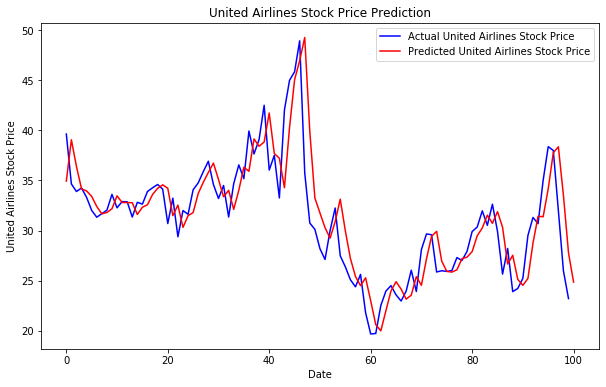

In [38]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(UAL_testing_processed, color='blue', label='Actual United Airlines Stock Price')
plt.plot(predictions , color='red', label='Predicted United Airlines Stock Price')
plt.title('United Airlines Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('United Airlines Stock Price')
plt.legend()
plt.show()

In [39]:
# Save the model - can be used later
model.save("United_Airlines_model_trained.h5")